# Data visualization
This notebook visualizes the outcomes of the de-biasing experiments. It allows to compare the performance of the edited models to the undebiased LMs and basline.

In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from evaluation_utility_functions import *

## Load data
Prepare data for specific LMs.

In [19]:
# Load undebiased scores into dataframe

file_undebiased_en = "../results/stereoset/evaluation_undebiased_LMs/stats/EN/evaluation_LMs_en_undebiased.json"
file_undebiased_de = "../results/stereoset/evaluation_undebiased_LMs/stats/DE/evaluation_LMs_de_undebiased.json"

file_biased_en = "../results/stereoset/evaluation_biased_LMs/stats/EN/evaluation_biased_LM-EN.json"
file_biased_de = "../results/stereoset/evaluation_biased_LMs/stats/DE/evaluation_biased_LM-DE.json"

# Load all scores
undebiased_en = load_overall_scores(file_undebiased_en)
undebiased_de = load_overall_scores(file_undebiased_de)

biased_en = load_overall_scores(file_biased_en)
biased_de = load_overall_scores(file_biased_de)

## (1) Plot undebiased model scores
First assess the bias in the original models. To get an overall impression the <em>iCAT scores</em> are plotted first.

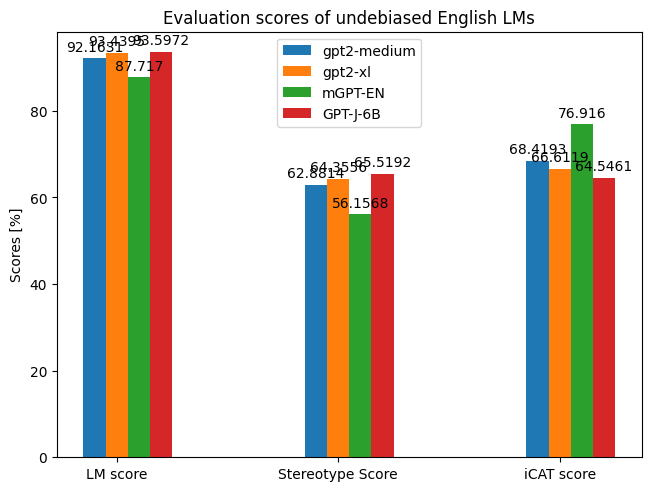

In [3]:
# Plot English scores in histogram
scores = ("LM score", "Stereotype Score", "iCAT score")
lm_vals_de = {
    'gpt2-medium': (undebiased_en["predictions_gpt2-medium-undebiased"][0], 
                    undebiased_en["predictions_gpt2-medium-undebiased"][1],
                   undebiased_en["predictions_gpt2-medium-undebiased"][2]),
    'gpt2-xl': (undebiased_en["predictions_gpt2-xl-undebiased"][0],
               undebiased_en["predictions_gpt2-xl-undebiased"][1],
               undebiased_en["predictions_gpt2-xl-undebiased"][2]),
    'mGPT-EN': (undebiased_en["predictions_ai-forever-mGPT-undebiased-en"][0],
               undebiased_en["predictions_ai-forever-mGPT-undebiased-en"][1],
               undebiased_en["predictions_ai-forever-mGPT-undebiased-en"][2]),
    'GPT-J-6B' : (undebiased_en["predictions_EleutherAI-gpt-j-6B-undebiased"][0],
                 undebiased_en["predictions_EleutherAI-gpt-j-6B-undebiased"][1],
                 undebiased_en["predictions_EleutherAI-gpt-j-6B-undebiased"][2])
}

x = np.arange(len(scores))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in lm_vals_de.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Scores [%]')
ax.set_title('Evaluation scores of undebiased English LMs')
ax.set_xticks(x + width, scores)
ax.legend()

plt.show()

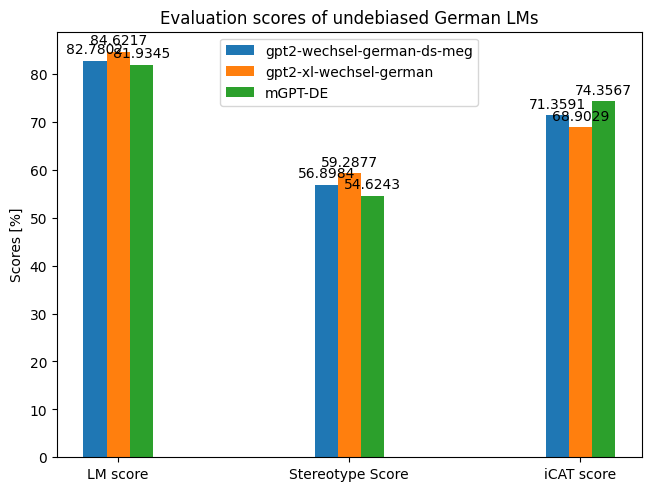

In [4]:
# Plot German scores in histogram
scores = ("LM score", "Stereotype Score", "iCAT score")
lm_vals_de = {
    'gpt2-wechsel-german-ds-meg': (undebiased_de["predictions_malteos-gpt2-wechsel-german-ds-meg-undebiased"][0],
                                  undebiased_de["predictions_malteos-gpt2-wechsel-german-ds-meg-undebiased"][1],
                                  undebiased_de["predictions_malteos-gpt2-wechsel-german-ds-meg-undebiased"][2]),
    'gpt2-xl-wechsel-german': (undebiased_de["predictions_malteos-gpt2-xl-wechsel-german-undebiased"][0],
                              undebiased_de["predictions_malteos-gpt2-xl-wechsel-german-undebiased"][1],
                              undebiased_de["predictions_malteos-gpt2-xl-wechsel-german-undebiased"][2]),
    'mGPT-DE': (undebiased_de["predictions_ai-forever-mGPT-de-undebiased"][0],
               undebiased_de["predictions_ai-forever-mGPT-de-undebiased"][1],
               undebiased_de["predictions_ai-forever-mGPT-de-undebiased"][2]),
}

x = np.arange(len(scores))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in lm_vals_de.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Scores [%]')
ax.set_title('Evaluation scores of undebiased German LMs')
ax.set_xticks(x + width, scores)
ax.legend()

plt.show()

Next, examine the <em>Stereotype Scores</em> which are more informative w.r.t. the actual degree of bias.

<BarContainer object of 4 artists>

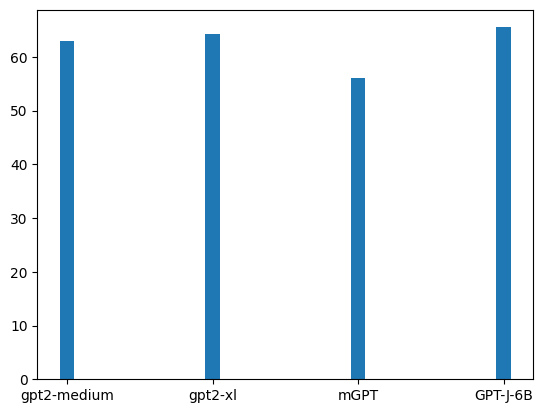

In [5]:
# Plot English Stereotype scores in histogram
xs = ["gpt2-medium", "gpt2-xl", "mGPT", "GPT-J-6B"]
ys = [undebiased_en["predictions_gpt2-medium-undebiased"][1], undebiased_en["predictions_gpt2-xl-undebiased"][1], 
      undebiased_en["predictions_ai-forever-mGPT-undebiased-en"][1],
      undebiased_en["predictions_EleutherAI-gpt-j-6B-undebiased"][1]]
plt.bar(height=ys, x=xs, width=0.1)

<BarContainer object of 3 artists>

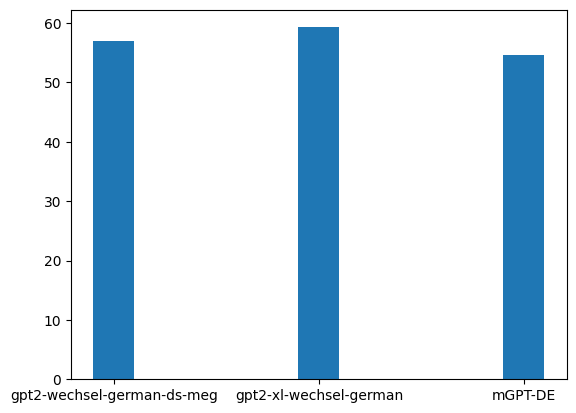

In [6]:
# Plot German Stereotype scores in histogram
xs_de = ["gpt2-wechsel-german-ds-meg", "gpt2-xl-wechsel-german", "mGPT-DE"]
ys_de = [undebiased_de["predictions_malteos-gpt2-wechsel-german-ds-meg-undebiased"][1], 
         undebiased_de["predictions_malteos-gpt2-xl-wechsel-german-undebiased"][1], 
         undebiased_de["predictions_ai-forever-mGPT-de-undebiased"][1]]
plt.bar(height=ys_de, x=xs_de, width=0.2)

## (2) Stepwise de-biased LMs
To assess whether a there exists a specific threshold for the number of updates at which model bias does not decrease anymore the following section explores <em>Stereotype scores</em> of English and German LMs.

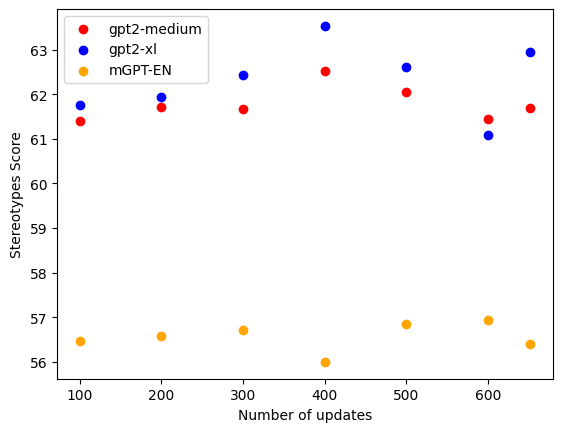

In [6]:
# Plot English scores in scatter plot
x_data = [i for i in range(100, 700, 100)]
x_data.append(652)

y_data_med = np.array([61.39, 61.72, 61.67, 62.52, 62.04, 61.45, 61.68])
y_data_xl = np.array([61.76, 61.94, 62.44, 63.53, 62.62, 61.09, 62.94])
y_data_mGPT_en = np.array([56.47, 56.57, 56.71, 56, 56.85, 56.95, 56.41])

plt.scatter(x_data, y_data_med, c ="red", label="gpt2-medium")
 
plt.scatter(x_data, y_data_xl, c ="blue", label="gpt2-xl")

plt.scatter(x_data, y_data_mGPT_en, c ="orange", label="mGPT-EN")
plt.legend()
plt.xlabel("Number of updates")
plt.ylabel("Stereotypes Score")
plt.show()

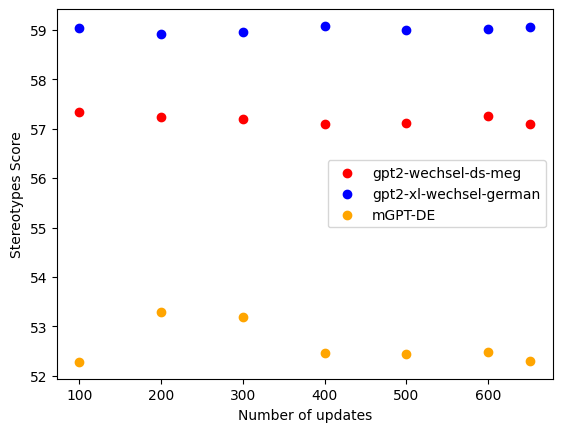

In [10]:
# Plot German scores in scatter plot
y_data_mGPT = np.array([52.28, 53.3, 53.18, 52.46, 52.44, 52.48, 52.3])
y_data_ds_meg = np.array([57.33, 57.23, 57.19, 57.1, 57.11, 57.26, 57.1])
y_data_wechsel_xl = np.array([59.04, 58.91, 58.95, 59.08, 58.99, 59.02, 59.05])

plt.scatter(x_data, y_data_ds_meg, c ="red", label="gpt2-wechsel-ds-meg")
 
plt.scatter(x_data, y_data_wechsel_xl, c ="blue", label="gpt2-xl-wechsel-german")

plt.scatter(x_data, y_data_mGPT, c ="orange", label="mGPT-DE")

plt.legend()
plt.xlabel("Number of updates")
plt.ylabel("Stereotypes Score")

plt.show()

# (3) Biased vs. undebiased vs. debiased LMs
The following section visualizes <em>Stereotype Scores</em> of deliberately biased, the original undebiased and the best performing debiased LM.

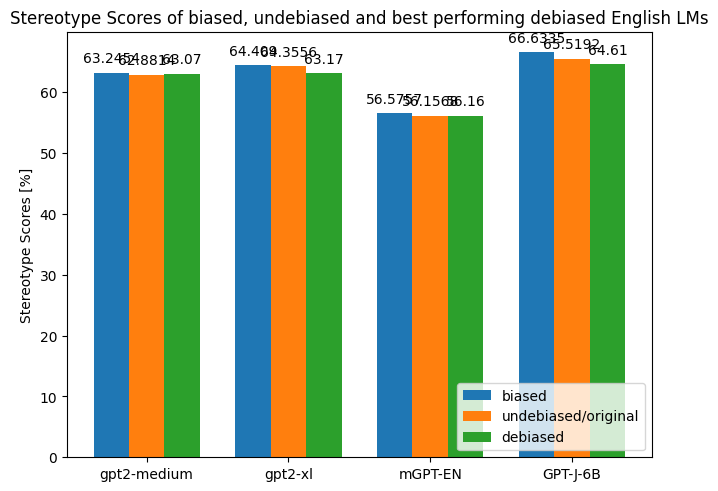

In [20]:
# Comparison of English LMs
scores = ("gpt2-medium", "gpt2-xl", "mGPT-EN", "GPT-J-6B")
lm_vals_en_comp = {
    'biased': (biased_en["gpt2-medium_biased_predictions"][1], biased_en["gpt2-xl_biased_predictions"][1], 
      biased_en["ai-forever-mGPT-en_biased_predictions"][1],
      biased_en["predictions_eleutherAI-gpt-j-biased"][1]),
    'undebiased/original': (undebiased_en["predictions_gpt2-medium-undebiased"][1], 
                            undebiased_en["predictions_gpt2-xl-undebiased"][1], 
      undebiased_en["predictions_ai-forever-mGPT-undebiased-en"][1],
      undebiased_en["predictions_EleutherAI-gpt-j-6B-undebiased"][1]),
    'debiased': (63.07, 63.17, 56.16, 64.61)
}

x = np.arange(len(scores))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_en_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Stereotype Scores of biased, undebiased and best performing debiased English LMs')
ax.set_xticks(x + width, scores)
ax.legend(loc="lower right")

plt.show()

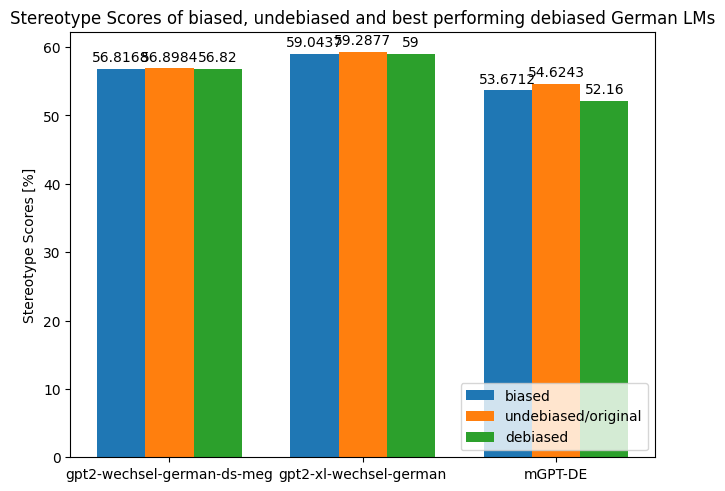

In [23]:
# Comparison of German LMs
scores_de = ("gpt2-wechsel-german-ds-meg", "gpt2-xl-wechsel-german", "mGPT-DE")
lm_vals_de_comp = {
    'biased': (biased_de["malteos-gpt2-wechsel-german-ds-meg_biased_predictions"][1], 
         biased_de["malteos-gpt2-xl-wechsel-german_biased_predictions"][1], 
         biased_de["ai-forever-mGPT-de_biased_predictions"][1]),
    'undebiased/original': (undebiased_de["predictions_malteos-gpt2-wechsel-german-ds-meg-undebiased"][1], 
         undebiased_de["predictions_malteos-gpt2-xl-wechsel-german-undebiased"][1], 
         undebiased_de["predictions_ai-forever-mGPT-de-undebiased"][1]),
    'debiased': (56.82, 59, 52.16)
}

x = np.arange(len(scores_de))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_de_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Stereotype Scores of biased, undebiased and best performing debiased German LMs')
ax.set_xticks(x + width, scores_de)
ax.legend(loc="lower right")

plt.show()

## (5) Evaluation of individual LMs
The following graphs visualize the scores of each update formulation strategy for each LM.

### (5. 1) English LMs

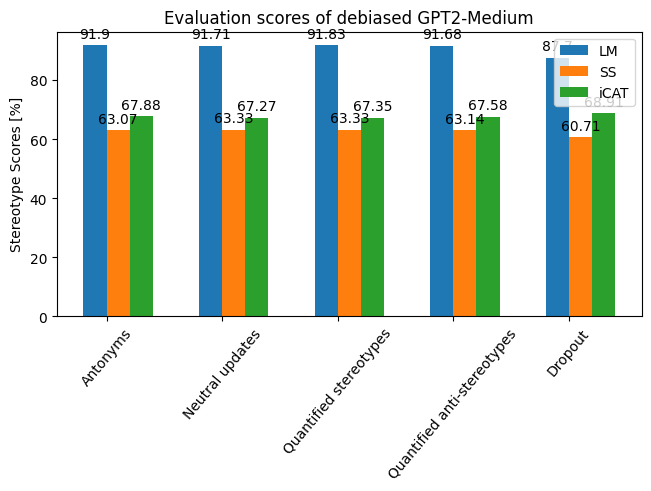

In [5]:
# GPT2-Medium
debias_type = ("Antonyms", "Neutral updates", "Quantified stereotypes", "Quantified anti-stereotypes", "Dropout")
lm_vals_med_comp = {
    'LM': (91.9, 91.71, 91.83, 91.68, 87.7),
    'SS': (63.07, 63.33, 63.33, 63.14, 60.71),
    'iCAT': (67.88, 67.27, 67.35, 67.58, 68.91)
}

x = np.arange(len(debias_type))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_med_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Evaluation scores of debiased GPT2-Medium')
ax.set_xticks(x + 0.5*width, debias_type, rotation=50)
ax.legend()

plt.show()

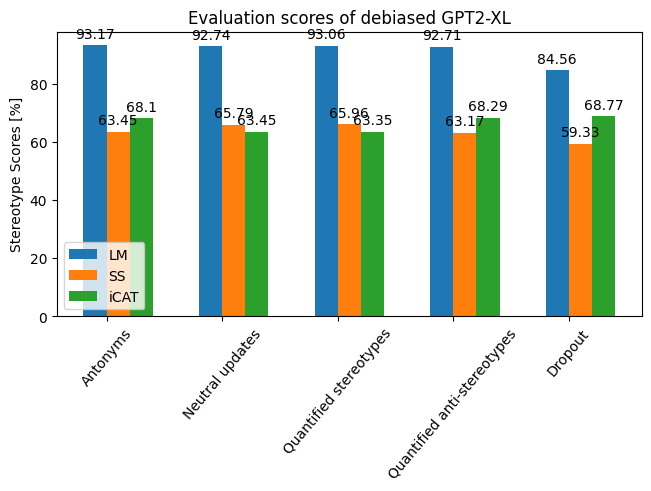

In [50]:
# GPT2-XL
lm_vals_xl_comp = {
    'LM': (93.17, 92.74, 93.06, 92.71, 84.56),
    'SS': (63.45, 65.79, 65.96, 63.17, 59.33),
    'iCAT': (68.1, 63.45, 63.35, 68.29, 68.77)
}

x = np.arange(len(debias_type))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_xl_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Evaluation scores of debiased GPT2-XL')
ax.set_xticks(x + 0.5*width, debias_type, rotation=50)
ax.legend(loc="lower left")

plt.show()

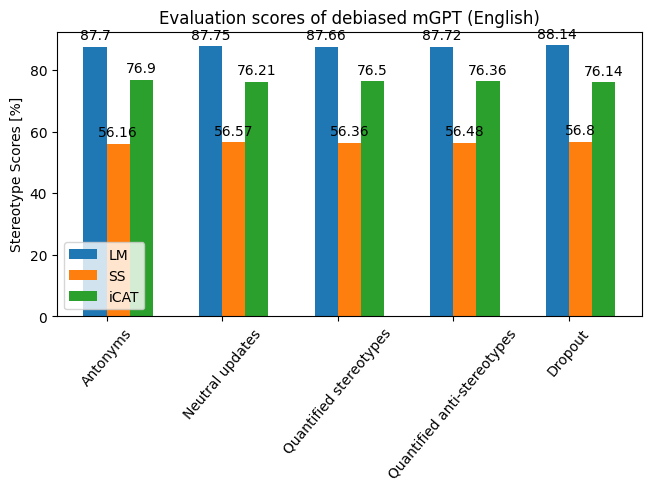

In [51]:
# EleutherAI/mGPT
lm_vals_mGPT_EN_comp = {
    'LM': (87.7, 87.75, 87.66, 87.72, 88.14),
    'SS': (56.16, 56.57, 56.36, 56.48, 56.8),
    'iCAT': (76.9, 76.21, 76.5, 76.36, 76.14)
}

x = np.arange(len(debias_type))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_mGPT_EN_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Evaluation scores of debiased mGPT (English)')
ax.set_xticks(x + 0.5*width, debias_type, rotation=50)
ax.legend(loc="lower left")

plt.show()

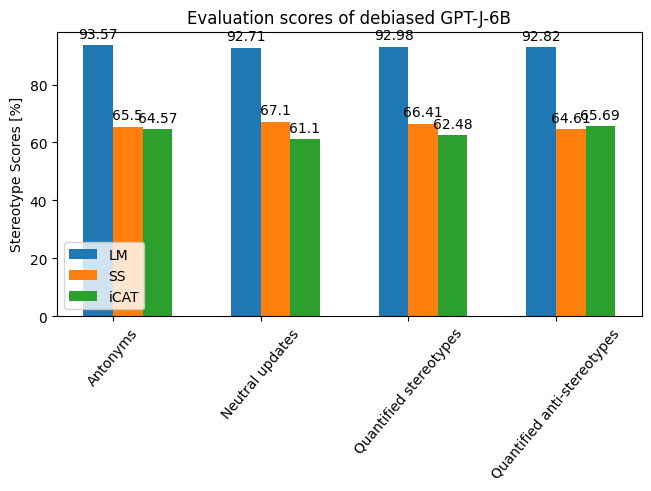

In [53]:
# GPT-J-6B
debias_type_mGPT = ("Antonyms", "Neutral updates", "Quantified stereotypes", "Quantified anti-stereotypes")
lm_vals_gpt_j_comp = {
    'LM': (93.57, 92.71, 92.98, 92.82),
    'SS': (65.5, 67.1, 66.41, 64.61),
    'iCAT': (64.57, 61.1, 62.48, 65.69)
}

x = np.arange(len(debias_type_mGPT))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_gpt_j_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Evaluation scores of debiased GPT-J-6B')
ax.set_xticks(x + 0.5*width, debias_type_mGPT, rotation=50)
ax.legend(loc="lower left")

plt.show()

### (5. 2) German LMs

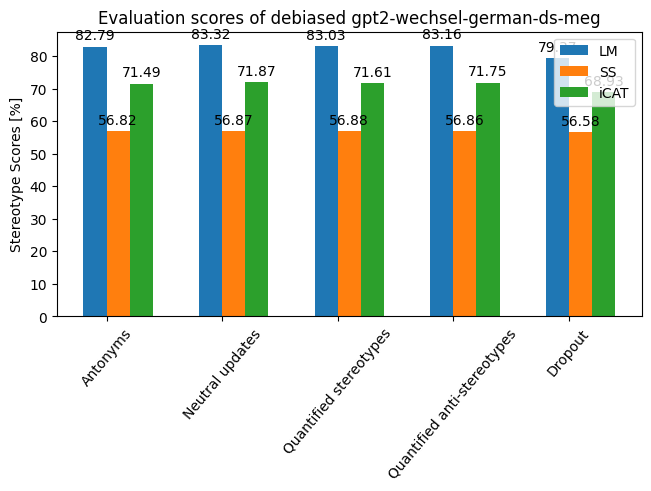

In [56]:
# malteos/gpt2-wechsel-german-ds-meg
lm_vals_meg_comp = {
    'LM': (82.79, 83.32, 83.03, 83.16, 79.37),
    'SS': (56.82, 56.87, 56.88, 56.86, 56.58),
    'iCAT': (71.49, 71.87, 71.61, 71.75, 68.93)
}

x = np.arange(len(debias_type))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_meg_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Evaluation scores of debiased gpt2-wechsel-german-ds-meg')
ax.set_xticks(x + 0.5*width, debias_type, rotation=50)
ax.legend()

plt.show()

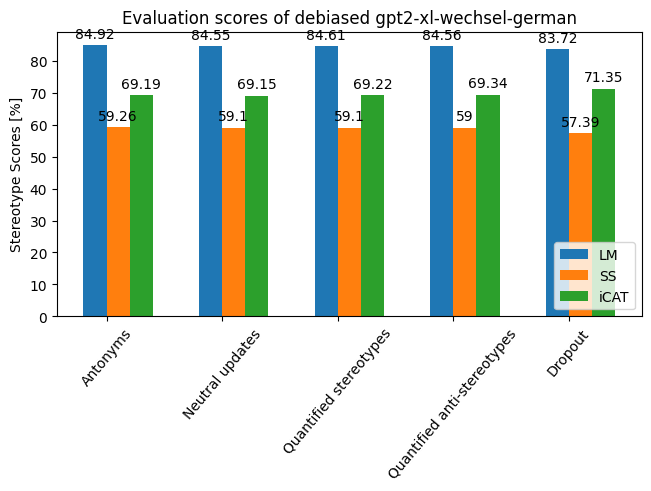

In [6]:
# malteos/gpt2-xl-wechsel-german
lm_vals_xl_comp = {
    'LM': (84.92, 84.55, 84.61, 84.56, 83.72),
    'SS': (59.26, 59.1, 59.1, 59, 57.39),
    'iCAT': (69.19, 69.15, 69.22, 69.34, 71.35)
}

x = np.arange(len(debias_type))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_xl_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Evaluation scores of debiased gpt2-xl-wechsel-german')
ax.set_xticks(x + 0.5*width, debias_type, rotation=50)
ax.legend(loc="lower right")

plt.show()

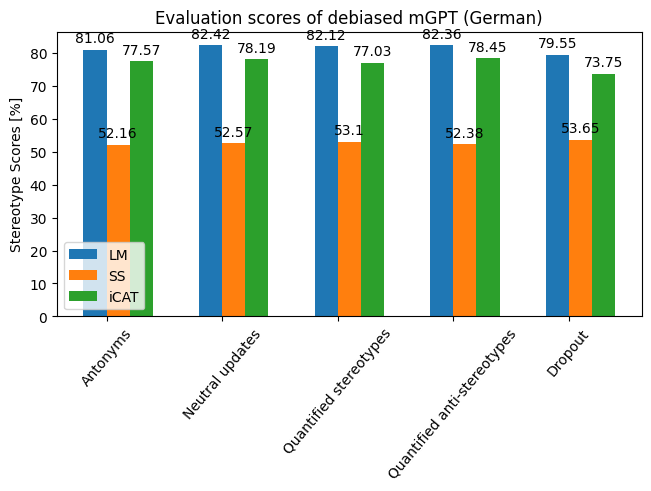

In [58]:
# EleutherAI/mGPT
lm_vals_mGPT_DE_comp = {
    'LM': (81.06, 82.42, 82.12, 82.36, 79.55),
    'SS': (52.16, 52.57, 53.1, 52.38, 53.65),
    'iCAT': (77.57, 78.19, 77.03, 78.45, 73.75)
}

x = np.arange(len(debias_type))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, score in lm_vals_mGPT_DE_comp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Stereotype Scores [%]')
ax.set_title('Evaluation scores of debiased mGPT (German)')
ax.set_xticks(x + 0.5*width, debias_type, rotation=50)
ax.legend(loc="lower left")

plt.show()